# Thanksgiving Data Manipulation

In [102]:
# import packages
import pandas as pd # working with df
import numpy as np 
import requests # sending an api request using requests module
from pandas.io.json import json_normalize # pandas package to flatten json files and convert to df 
import json # api data is in json format
import matplotlib.pyplot as plt # visualize data
%matplotlib inline

In [103]:
# set API key
apiKey = "lorem ipsum"

# set  parameter
params = {'api_key' : apiKey}

In [104]:
# create a food list
food_list = ["turkey", "macaroni and cheese", "mashed potatoes", "bread stuffing", 
             "ham", "sweet potato souffle", "cranberry sauce", "mixed vegetables", 
             "apple pie", "pecan pie"]


In [105]:
# create a counter
counter = 0

# execute api call for each food, tracking with counter
for food in food_list:

    # increment counter for sequence of foods
    counter=counter+1
    
    # send api request
    response = requests.post(
        r'https://api.nal.usda.gov/fdc/v1/search', # endpoint
        params=params, # api key
        json={'generalSearchInput': food} # pass food string to api call to search for a food in food_list
    )
    
    # save response to json
    item = response.json()
    
    # find length of each item list to see how many matches there are. there can be multiple per keyword
    length = [i for i in range(len(item['foods']))] 
    
    # create df for all matches of a food word
    for i in length:
        # initialize df with first food
        if i == 0: 
            rdf = pd.json_normalize(item['foods'][i]['foodNutrients']) # get foodNutrients of food at position i
        # create new df for subsequent foods and concatenate
        else: 
            df = pd.json_normalize(item['foods'][i]['foodNutrients'])
            rdf = pd.concat([rdf,df])
    
    # recode variables to simplify names
    rdf['nutrientName'].replace('Energy','Energy',inplace=True)
    rdf['nutrientName'].replace('Carbohydrate, by difference','Carbs',inplace=True)
    rdf['nutrientName'].replace('Protein','Protein',inplace=True)
    rdf['nutrientName'].replace('Fiber, total dietary','Fiber',inplace=True)
    rdf['nutrientName'].replace('Total lipid (fat)','Fat',inplace=True)
    rdf['nutrientName'].replace('Sodium, Na','Sodium',inplace=True)
    rdf['nutrientName'].replace('Fatty acids, total saturated','Sat_Fatty_Acids',inplace=True)
    rdf['nutrientName'].replace('Calcium, Ca','Calcium',inplace=True)
    rdf['nutrientName'].replace('Iron, Fe','Iron',inplace=True)
    rdf['nutrientName'].replace('Sugars, total including NLEA','Sugar',inplace=True)
    rdf['nutrientName'].replace('Cholesterol','Chol',inplace=True)
    rdf['nutrientName'].replace('Fatty acids, total trans','Trans_Fatty_Acids',inplace=True)
    rdf['nutrientName'].replace('Vitamin C, total ascorbic acid','VitaminC',inplace=True)
    rdf['nutrientName'].replace('Vitamin A, IU','VitaminA',inplace=True)
    rdf['nutrientName'].replace('Potassium, K','Potassium',inplace=True)
    rdf['nutrientName'].replace('Fatty acids, total polyunsaturated','Unsat_Fatty_Acids',inplace=True)   
  
    # aggregate to one row per nutrient/food match and find average
    agg_food = rdf[['nutrientName','value']].groupby(['nutrientName']).agg('mean')
    
    # reset index
    agg_food = agg_food.reset_index()
    
    # rename columns
    agg_food.columns = ["nutrientName","Value"]    
    
    # subset data to only include needed nutrients
    agg_food = agg_food[agg_food["nutrientName"].isin(['Energy','Carbs','Protein','Fiber','Fat'])] # if nutrientName is any one of these values, we will keep it in the df
     
    # set food name into a variable - different per iteration
    agg_food["Food"] = food 
        
    # transpose data so nutrient values are their own columns
    new = agg_food.pivot_table(index = ["Food"], columns = ['nutrientName'], values = 'Value')
    
    # reset index
    new.reset_index(inplace = True)
    
    # append food match to a dataframe with all foods
    if counter == 1: # initialize df if it's the first food in the list
        all_foods = new
    else: # combine records onto existing df for other foods
        all_foods = pd.concat([all_foods,new]) 
        
print(all_foods)
        
        

nutrientName                  Food      Carbs      Energy        Fat  \
0                           turkey   6.722600  431.455882  12.502400   
0              macaroni and cheese  20.468400  329.632353   6.891600   
0                  mashed potatoes  39.967400  228.296296   4.126800   
0                   bread stuffing  27.500600  361.431034  10.006200   
0                              ham   8.734600  292.492063   8.775800   
0             sweet potato souffle  25.800000  232.466667   7.047800   
0                  cranberry sauce  27.093469  217.928571   0.620000   
0                 mixed vegetables   9.695800   49.632653   0.022653   
0                        apple pie  37.518000  321.240741  12.848200   
0                        pecan pie  43.640000  502.185185  23.939200   

nutrientName     Fiber  Protein  
0             0.329787  16.2948  
0             0.946000   6.6384  
0             3.092000   4.5120  
0             2.278000   8.2718  
0             0.492683  13.6342  
0  

In [106]:
counter = 0

# execute api call for each food, tracking with counter
for food in food_list: 
    
    counter = counter + 1
    
    response = requests.post(
         r'https://api.nal.usda.gov/fdc/v1/search', # endpoint
        params = params, #api key
        json={'generalSearchInput': food} # each food in food_list
    )
    
    item = response.json() # save response to json
    
    # get length of foods dictionary and i for each item
    length = [i for i in range(len(item['foods']))]

    # create a dataframe for all matches of a food word
    for i in length:
        if i == 0: 
            # initialize df with first food
            rdf = pd.json_normalize(item['foods'][i]['foodNutrients']) # get foodNutrients of food at position i
        else: 
            # create new df for subsequent foods and concatenate
            df = pd.json_normalize(item['foods'][i]['foodNutrients'])
            rdf = pd.concat([rdf, df])
            
    # recode column/variable values to simplify names
    rdf['nutrientName'].replace('Energy','Energy',inplace=True)
    rdf['nutrientName'].replace('Carbohydrate, by difference','Carbs',inplace=True)
    rdf['nutrientName'].replace('Protein','Protein',inplace=True)
    rdf['nutrientName'].replace('Fiber, total dietary','Fiber',inplace=True)
    rdf['nutrientName'].replace('Total lipid (fat)','Fat',inplace=True)
    rdf['nutrientName'].replace('Sodium, Na','Sodium',inplace=True)
    rdf['nutrientName'].replace('Fatty acids, total saturated','Sat_Fatty_Acids',inplace=True)
    rdf['nutrientName'].replace('Calcium, Ca','Calcium',inplace=True)
    rdf['nutrientName'].replace('Iron, Fe','Iron',inplace=True)
    rdf['nutrientName'].replace('Sugars, total including NLEA','Sugar',inplace=True)
    rdf['nutrientName'].replace('Cholesterol','Chol',inplace=True)
    rdf['nutrientName'].replace('Fatty acids, total trans','Trans_Fatty_Acids',inplace=True)
    rdf['nutrientName'].replace('Vitamin C, total ascorbic acid','VitaminC',inplace=True)
    rdf['nutrientName'].replace('Vitamin A, IU','VitaminA',inplace=True)
    rdf['nutrientName'].replace('Potassium, K','Potassium',inplace=True)
    rdf['nutrientName'].replace('Fatty acids, total polyunsaturated','Unsat_Fatty_Acids',inplace=True)   
      
    # aggregate to one row per nutrient/food match and find average
    agg_food = rdf[['nutrientName', 'value']].groupby(['nutrientName']).agg('mean')

    # reset index
    agg_food = agg_food.reset_index()

    # rename columns
    agg_food.columns = ['Nutrient Name', 'Value']
                                
    # subset data to only include the needed nutrients
    agg_food = agg_food[agg_food['Nutrient Name'].isin(['Energy','Carbs','Protein','Fiber','Fat'])]    

    # set food name into a variable so we know what values each food is associated with
    agg_food["Food"] = food 
        
    # transpose the data so the nutrient values are their own columns
    new=agg_food.pivot_table(index = ["Food"], columns = ['Nutrient Name'], values = 'Value')

    # reset the index
    new.reset_index(inplace=True)
    
    print(new)
    
    # append food match to a dataframe with all foods
    if counter == 1: # initialize the df if it's the first food in the list
        all_foods = new
    else: # combine records onto existing df for other foods
        all_foods = pd.concat([all_foods,new]) 
           

Nutrient Name    Food   Carbs      Energy      Fat     Fiber  Protein
0              turkey  6.7226  431.455882  12.5024  0.329787  16.2948
Nutrient Name                 Food    Carbs      Energy     Fat  Fiber  \
0              macaroni and cheese  20.4684  329.632353  6.8916  0.946   

Nutrient Name  Protein  
0               6.6384  
Nutrient Name             Food    Carbs      Energy     Fat  Fiber  Protein
0              mashed potatoes  39.9674  228.296296  4.1268  3.092    4.512
Nutrient Name            Food    Carbs      Energy      Fat  Fiber  Protein
0              bread stuffing  27.5006  361.431034  10.0062  2.278   8.2718
Nutrient Name Food   Carbs      Energy     Fat     Fiber  Protein
0              ham  8.7346  292.492063  8.7758  0.492683  13.6342
Nutrient Name                  Food  Carbs      Energy     Fat  Fiber  Protein
0              sweet potato souffle   25.8  232.466667  7.0478  2.688   2.9092
Nutrient Name             Food      Carbs      Energy   Fat     Fib

## Protein and Energy Graph

Text(0.5, 1.0, 'Is there an association between the amount of protein and energy in a food?')

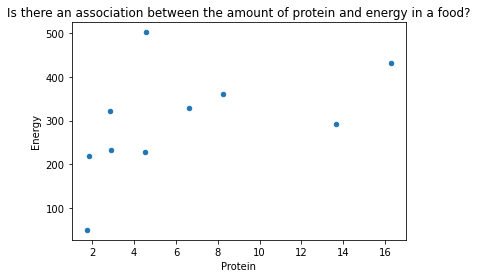

In [107]:
# Protein and Energy Graph

all_foods.plot.scatter(x='Protein', y='Energy')

plt.xlabel("Protein")
plt.ylabel("Energy")
plt.title("Is there an association between the amount of protein and energy in a food?")

## Protein and Energy Interpretation
The graph displays a general positive trend. As the amount of protein in a food increases, the amount of energy tends to increase as well. However, it does not seem to be a strong relationship. There are some outliers, so more data would be helpful in determining this association. 

## Carbs Graph

Text(0.5, 1.0, 'Which food has the most carbs?')

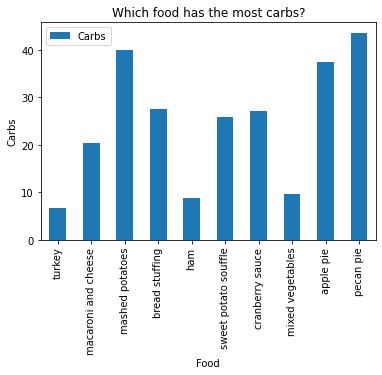

In [108]:
# Carbs concentration of each food item

all_foods.plot.bar(x='Food',y='Carbs')

# Add labels
plt.xlabel("Food")
plt.ylabel("Carbs")
plt.title("Which food has the most carbs?")

## Carbs Interpretation

Pecan pie has the highest amount of carbs, and turkey has the lowest amount of carbs. Bread stuffing, sweet potato souffle, and cranberry sauce all have comparable carb values between 20-30. A ranking of the three foods with the highest amounts of carbs would be (1) pecan pie, (2) mashed potatoes, and (3) apple pie. 

## Energy Graph

Text(0.5, 1.0, 'Which food has the most energy?')

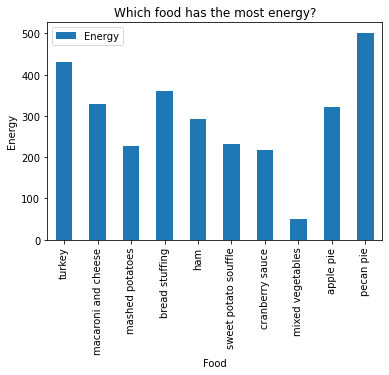

In [109]:
# Energy concentration of each food item

all_foods.plot.bar(x='Food', y='Energy')

# Add labels
plt.xlabel('Food')
plt.ylabel('Energy')
plt.title('Which food has the most energy?')


## Energy Interpretation

Pecan pie has the highest amount of energy, which makes sense because it also contains the highest amount of fat and carbs. Mixed vegetables has the lowest amount of energy. Mashed potatoes, sweet potato souffle, and cranberry sauce contain very similar amounts of energy. A ranking of the three foods with the highest amounts of energy would be (1) pecan pie, (2) turkey, and (3) bread stuffing. 

## Fat Graph

Text(0.5, 1.0, 'Which food has the most fat?')

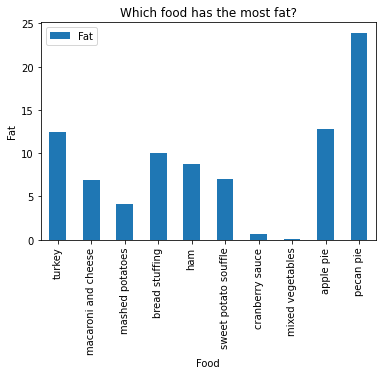

In [110]:
# Fat concentration of each food item

all_foods.plot.bar(x='Food', y="Fat")

# Add labels
plt.xlabel("Food")
plt.ylabel("Fat")
plt.title("Which food has the most fat?")

## Fat Interpretation

Pecan pie contains the highest amount of fat, followed by apple pie and turkey, which have comparable amounts. The first and second rankings make sense because pecan pie and apple pie are both desserts. The food with the lowest amount of fat is mixed vegetables. Cranberry sauce also contains very little fat. All of the fat values are below 14 units except for pecan pie's, which is an outlier because it is significantly higher.

## Fiber Graph

Text(0.5, 1.0, 'Which food has the most fiber?')

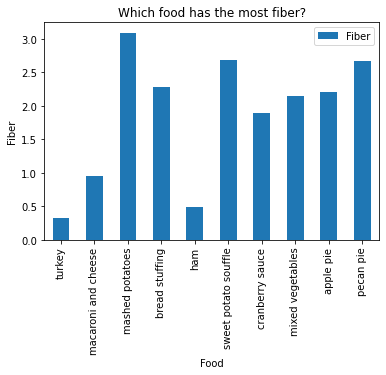

In [111]:
# Fiber concentration of each food item

all_foods.plot.bar(x="Food", y='Fiber')

# Add labels
plt.xlabel("Food")
plt.ylabel("Fiber")
plt.title("Which food has the most fiber?")

## Fiber Interpretation

Mashed potatoes has the highest amount of fiber, followed by sweet potato souffle and pecan pie. This makes sense because potatoes and nuts generally contain a lot of fiber. Ham and turkey have the lowest amounts of fiber. The amounts in bread stuffing, mixed vegetables, and apple pie are comparable. 

## Protein Graph

Text(0.5, 1.0, 'Which food has the most protein?')

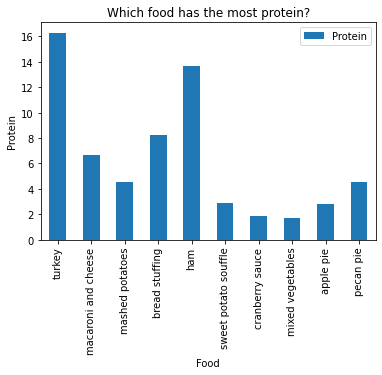

In [112]:
# Protein concentration of each food item

all_foods.plot.bar(x='Food', y='Protein')

# Add labels
plt.xlabel('Food')
plt.ylabel('Protein')
plt.title('Which food has the most protein?')

## Protein Interpretation

Turkey has the highest amount of protein, followed by ham, which also has a high value. Mixed vegetables has the lowest amount of protein, closely followed by cranberry sauce. These results make sense because meats are rich in protein, and fruits and vegetables are not. 

## Analysis 1

#### The healthiest/most nutritious Thanksgiving foods are...

I think that mashed potatoes and bread stuffing are the most nutritious foods. They both contain high amounts of fiber and have moderate levels of energy. While mashed potatoes contains a lot of carbs, which may be interpreted as unhealthy, it also contains the third lowest amount of fat. Bread stuffing contains a moderate amount of fat but has the third highest amount of energy. Two other nutritious foods are turkey and ham. Their protein values are much higher than those of the other foods, and turkey contains the second highest amount of energy (ham is fifth highest). 

## Analysis 2

#### The least healthy/least nutritious Thanksgiving foods are...

I think that pecan pie is the least healthy food because it is very high in fat. It has the highest amount of energy, but this is likely because it has the highest fat concentration. Based on the available data, mixed vegetables do not seem to be very nutritious either. While they contain a good amount of fiber, they have very little protein or energy. A third Thanksgiving food that seems less healthy than the others is apple pie. Apple pie has among the highest fat concentrations, and pie crust (used for both pecan pie and apple pie) contains a lot of fat from butter.